# Closed XXZ Chain Bethe Ansatz Eigenstates on a Quantum Computer

In [1]:
# qiskit 0.29.0

## Toffoli circuit

### Creating the circuit

In [1]:
from qiskit import *
from math import pi

In [2]:
M = 3

# create 3 quantum registers, one for each qubit
q=QuantumRegister(M**2)

# create 3 corresponding classical registers (needed for storing measurement results)
c=ClassicalRegister(M**2)

# create a quantum circuit with these registers
chain = QuantumCircuit(q,c)

# NOT gates on q[0] and q[1]
chain.x(q[0])
chain.x(q[4])

#Another NOT gate for second iteration

chain.x(q[8])

chain.barrier()

# double-controlled-NOT (Toffoli) gate; controls={q[0],q[1]};  target=q[2]
# toffoli.ccx(q[0], q[1], q[2])

# Construct ASWAP gates

## cNOT (controlled-NOT) gate; control=q[0];  target=q[1]
chain.cx(q[4],q[1])
chain.cx(q[8],q[5])


## R_z qubit rotation gate; target=q[4], angle = -pi
chain.rz(-pi,q[4])
chain.rz(-pi,q[8])

## R_y qubit rotation gate; target=q[4], angle = -3*pi/4
chain.ry(-3*pi/4,q[4])
chain.ry(-2.53,q[8])

chain.cx(q[1],q[4])
chain.cx(q[5],q[8])

## R_y qubit rotation gate; target=q[4], angle = -3*pi/4
chain.ry(3*pi/4,q[4])
chain.ry(2.53,q[8])

## R_z qubit rotation gate; target=q[4], angle = -pi
chain.rz(pi,q[4])
chain.rz(pi,q[8])

## cNOT (controlled-NOT) gate; control=q[0];  target=q[1]
chain.cx(q[4],q[1])
chain.cx(q[8],q[5])

chain.barrier()

# cSWAP (controlled-SWAP gate); control = q[1], target=(q[0], q[3])
chain.cswap(q[1],q[0],q[3])

#chain.cp(pi,q[0], q[1])

chain.barrier()

# Construct ASWAP gates

## cNOT (controlled-NOT) gate; control=q[0];  target=q[1]
chain.cx(q[5],q[2])

## R_z qubit rotation gate; target=q[4], angle = -pi
chain.rz(-pi,q[5])

## R_y qubit rotation gate; target=q[4], angle = -3*pi/4
chain.ry(-3*pi/4,q[5])

chain.cx(q[2],q[5])

## R_y qubit rotation gate; target=q[4], angle = -3*pi/4
chain.ry(3*pi/4,q[5])

## R_z qubit rotation gate; target=q[4], angle = -pi
chain.rz(pi,q[5])

## cNOT (controlled-NOT) gate; control=q[0];  target=q[1]
chain.cx(q[5],q[2])

chain.barrier()

# cSWAPs (controlled SWAP)
chain.cswap(q[2],q[0],q[3])
chain.cswap(q[2],q[1],q[4])


# measurement gates
chain.measure(q, c)

### Visualizing the circuit

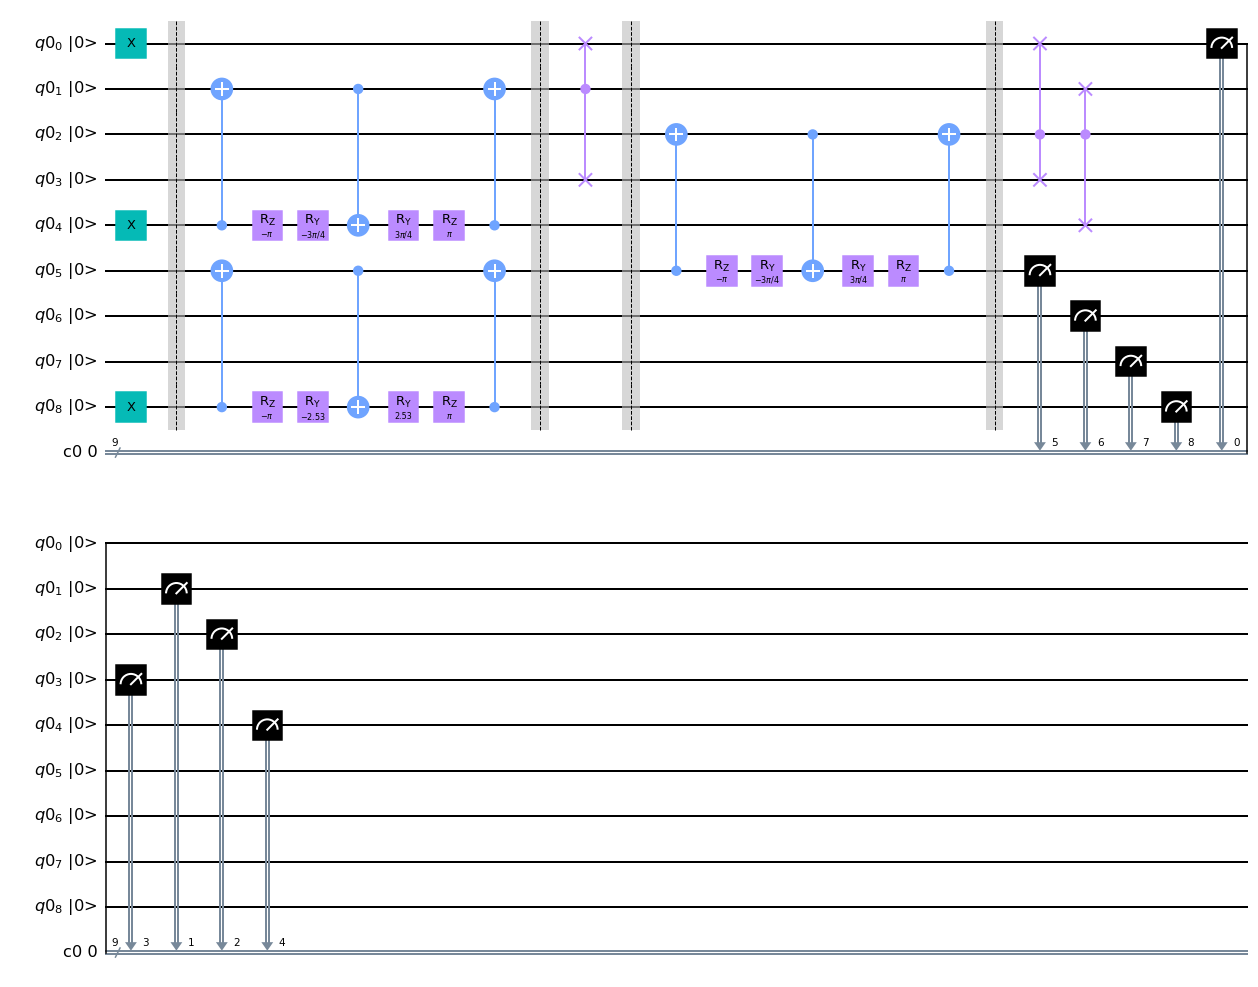

In [3]:
chain.draw(output='mpl', initial_state=True)

### Executing the circuit on the local qasm simulator

In [4]:
from qiskit import Aer

simulator = Aer.get_backend('qasm_simulator')

In [5]:
# We've set the number of shots (repeats) of the circuit
# to be 1024, which is the default value
job_sim = execute(chain, backend=simulator, shots=1024000)

In [6]:
# Grab the results from the job
result_sim = job_sim.result()

In [7]:
counts_sim = result_sim.get_counts(chain)
print(counts_sim)

{'000010101': 171017, '000101010': 172001, '100010001': 168811, '100001010': 169529, '000001110': 171259, '000110001': 171383}


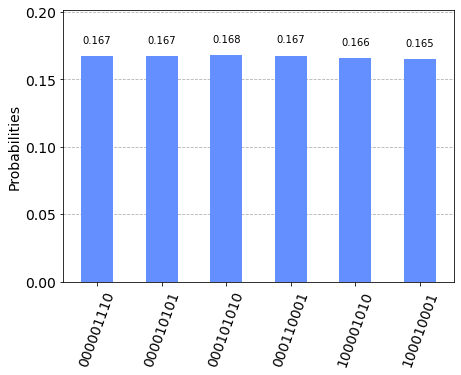

In [8]:
# Plot a histogram of the results
from qiskit.visualization import plot_histogram
plot_histogram(counts_sim)

### Executing the circuit on a real device

In [10]:
# The FIRST time that you execute on an IBM backend, you must save your account number, as follows:
# from qiskit import IBMQ
# IBMQ.save_account('your_account_number_goes_here')

In [9]:
# Loads your personal account number, which you have previously saved
from qiskit import IBMQ
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
provider = IBMQ.get_provider()

In [11]:
# Available IBM devices that are NOT a simulator
provider.backends(simulator=False, operational=True)

[<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [20]:
# We choose the least-busy IBM device that is NOT a simulator
from qiskit.providers.ibmq import least_busy
lb_device = least_busy(provider.backends(simulator=False, operational=True,n_qubits = 5))

In [21]:
lb_device.name()

'ibmq_belem'

In [16]:
job_exp = execute(toffoli, backend = lb_device)

TranspilerError: 'Number of qubits (3) in circuit-0 is greater than maximum (1) in the coupling_map'

In [22]:
job_exp.status()

NameError: name 'job_exp' is not defined

In [ ]:
job_exp.queue_position()

In [ ]:
jobid = job_exp.job_id()
jobid

In [ ]:
job_exp.status()

In [ ]:
retrieved_job = lb_device.retrieve_job(jobid)

In [ ]:
result_exp = retrieved_job.result()

In [ ]:
counts_exp = result_exp.get_counts(toffoli)
print(counts_exp)

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram([counts_exp,counts_sim], legend=['Device', 'Simulator'])